### Libraries

In [41]:
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [42]:
%run ..//Library//SVRmape_Library.ipynb 

### Functions

In [43]:
def mape_score(y_real, y_predict):
    return np.mean(np.abs((y_real - y_predict)/y_real))*100

### Load data

In [44]:
boston = load_boston()

# Initializing the dataframe
data = pd.DataFrame(boston.data)

#Adding the feature names to the dataframe
data.columns = boston.feature_names

In [45]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [46]:
#Adding target variable to dataframe
data['PRICE'] = boston.target 

In [47]:
# Spliting target variable and independent variables
X = data.drop(['PRICE'], axis = 1)
y = data['PRICE']

In [48]:
# features with symbolic transoformation
# X = pd.read_csv("newBoston.csv")

In [49]:
# Splitting to training and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

In [50]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Fit model

In [40]:
model = SVR_mape(kernel = "rbf", C = 15.631280, epsilon = 5.804601, gamma = 0.032920)

In [23]:
fitted = model.fit(X_train, y_train)

### Metric

In [24]:
predict = fitted.predict(X_train)
forecast = fitted.predict(X_test)

In [25]:
## R2 
r2_train = metrics.r2_score(y_train, predict) 
r2_test = metrics.r2_score(y_test, forecast)
print(f"R2_train: {r2_train:.4}, \nR2_test: {r2_test:.4}")

R2_train: 0.8908, 
R2_test: 0.8744


In [39]:
mape_train = mape_score(y_train, predict)
mape_test = mape_score(y_test, forecast)
print(f"MAPE_train: {mape_train:.5}, \nMAPE_test: {mape_test:.6}")

MAPE_train: 6.9446, 
MAPE_test: 10.508


In [34]:
mse_train = metrics.mean_squared_error(y_train, predict) 
mse_test = metrics.mean_squared_error(y_test, forecast)
print(f"MSE_train: {mse_train:.4}, \nMSE_test: {mse_test:.6}")

MSE_train: 8.219, 
MSE_test: 13.112


### Plots

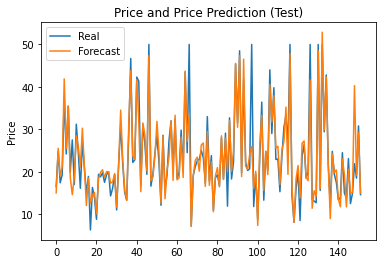

In [16]:
plt.title("Price and Price Prediction (Test)")
plt.plot(y_test.to_numpy(), label = "Real")
plt.plot(forecast, label = "Forecast")
plt.ylabel("Price")
plt.legend();

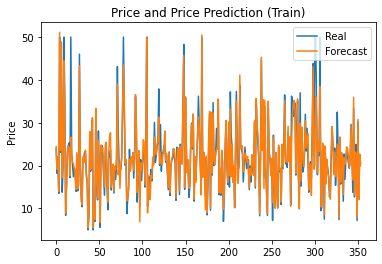

In [17]:
plt.title("Price and Price Prediction (Train)")
plt.plot(y_train.to_numpy(), label = "Real")
plt.plot(predict, label = "Forecast")
plt.ylabel("Price")
plt.legend();